In [ ]:
 # Aldo Andika

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Final Project/dataset/df_tableau.csv')

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Untuk Balance Data
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Decision tree, XGBoost dan SVM
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

### Tipe data disamakan

In [ ]:
data

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5008806,Laki-laki,Ya,Ya,0,112500,Bekerja,G,M,MH,1,0,0,0,Security staff,2,59,3,0
1,5008815,Laki-laki,Ya,Ya,0,270000,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2,0
2,5112956,Laki-laki,Ya,Ya,0,270000,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2,0
3,5008819,Laki-laki,Ya,Ya,0,135000,Asosiasi komersial,G,M,MH,1,0,0,0,Laborers,2,49,3,0
4,5008820,Laki-laki,Ya,Ya,0,135000,Asosiasi komersial,G,M,MH,1,0,0,0,Laborers,2,49,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24988,5149041,Perempuan,Tidak,Ya,0,180000,Bekerja,G,M,MH,1,0,0,0,Laborers,2,54,10,1
24989,5149042,Perempuan,Tidak,Ya,0,180000,Bekerja,G,M,MH,1,0,0,0,Laborers,2,54,10,1
24990,5149834,Perempuan,Tidak,Ya,0,157500,Asosiasi komersial,PG,M,MH,1,0,1,1,Medicine staff,2,34,4,1
24991,5149838,Perempuan,Tidak,Ya,0,157500,Pensioner,PG,M,MH,1,0,1,1,Medicine staff,2,34,4,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24993 entries, 0 to 24992
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id_customer          24993 non-null  int64 
 1   JK                   24993 non-null  object
 2   KepemilikanMobil     24993 non-null  object
 3   KepemilikanProperti  24993 non-null  object
 4   JmlAnak              24993 non-null  int64 
 5   Pendapatan           24993 non-null  object
 6   TipePendapatan       24993 non-null  object
 7   TingkatPendidikan    24993 non-null  object
 8   StatusKeluarga       24993 non-null  object
 9   TipeRumah            24993 non-null  object
 10  FlagMobile           24993 non-null  int64 
 11  FlagWorkPhone        24993 non-null  int64 
 12  FlagPhone            24993 non-null  int64 
 13  Email                24993 non-null  int64 
 14  Pekerjaan            24993 non-null  object
 15  JmlAnggotaKeluarga   24993 non-null  int64 
 16  Age 

In [ ]:
# Ganti , ke . supaya bisa dijadiin tipe float

data['Pendapatan'] = data['Pendapatan'].replace(['116653,5'], '116653.5')
data['Pendapatan'] = data['Pendapatan'].replace(['184135,5'], '184135.5')
data['Pendapatan'] = data['Pendapatan'].replace(['190399,5'], '190399.5')
data['Pendapatan'] = data['Pendapatan'].replace(['716323,5'], '716323.5')
data['Pendapatan'] = data['Pendapatan'].replace(['170302,5'], '170302.5')
data['Pendapatan'] = data['Pendapatan'].replace(['62653,5'], '62653.5')
data['Pendapatan'] = data['Pendapatan'].replace(['60376,5'], '60376.5')
data['Pendapatan'] = data['Pendapatan'].replace(['134995,5'], '134995.5')
data['Pendapatan'] = data['Pendapatan'].replace(['128542,5'], '128542.5')

In [ ]:
# Ganti pendapatan ke tipe data float/numerik

data['Pendapatan'] = data['Pendapatan'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24993 entries, 0 to 24992
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          24993 non-null  int64  
 1   JK                   24993 non-null  object 
 2   KepemilikanMobil     24993 non-null  object 
 3   KepemilikanProperti  24993 non-null  object 
 4   JmlAnak              24993 non-null  int64  
 5   Pendapatan           24993 non-null  float64
 6   TipePendapatan       24993 non-null  object 
 7   TingkatPendidikan    24993 non-null  object 
 8   StatusKeluarga       24993 non-null  object 
 9   TipeRumah            24993 non-null  object 
 10  FlagMobile           24993 non-null  int64  
 11  FlagWorkPhone        24993 non-null  int64  
 12  FlagPhone            24993 non-null  int64  
 13  Email                24993 non-null  int64  
 14  Pekerjaan            24993 non-null  object 
 15  JmlAnggotaKeluarga   24993 non-null 

In [ ]:
columns = data.select_dtypes('object').columns.to_list()

columns

['JK',
 'KepemilikanMobil',
 'KepemilikanProperti',
 'TipePendapatan',
 'TingkatPendidikan',
 'StatusKeluarga',
 'TipeRumah',
 'Pekerjaan']

In [ ]:
# Ganti kolom overdue ke kategori dan variable columns
data['Overdue'] = data['Overdue'].astype('category')

data[columns] = data[columns].astype('category')

In [ ]:
data.columns

Index(['Id_customer', 'JK', 'KepemilikanMobil', 'KepemilikanProperti',
       'JmlAnak', 'Pendapatan', 'TipePendapatan', 'TingkatPendidikan',
       'StatusKeluarga', 'TipeRumah', 'FlagMobile', 'FlagWorkPhone',
       'FlagPhone', 'Email', 'Pekerjaan', 'JmlAnggotaKeluarga', 'Age',
       'Experience', 'Overdue'],
      dtype='object')

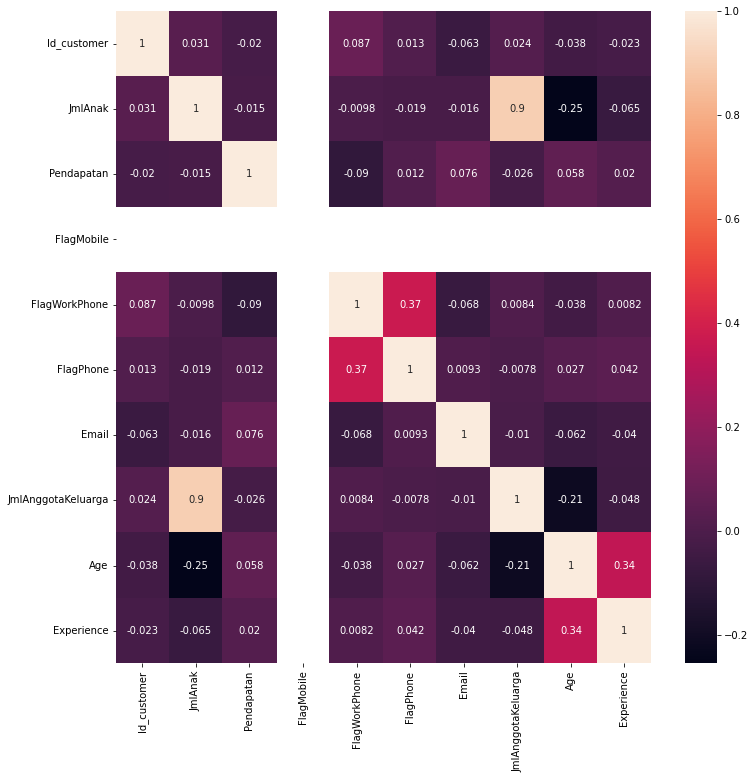

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

## Drop Tabel

In [ ]:
# Drop tabel yg tidak diperlukan ((FlagMobile karena valuenya hanya 1))

data = data.drop(['FlagMobile'], axis=1)

data.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5008806,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,0,0,0,Security staff,2,59,3,0
1,5008815,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,Accountants,2,46,2,0
2,5112956,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,Accountants,2,46,2,0
3,5008819,Laki-laki,Ya,Ya,0,135000.0,Asosiasi komersial,G,M,MH,0,0,0,Laborers,2,49,3,0
4,5008820,Laki-laki,Ya,Ya,0,135000.0,Asosiasi komersial,G,M,MH,0,0,0,Laborers,2,49,3,0


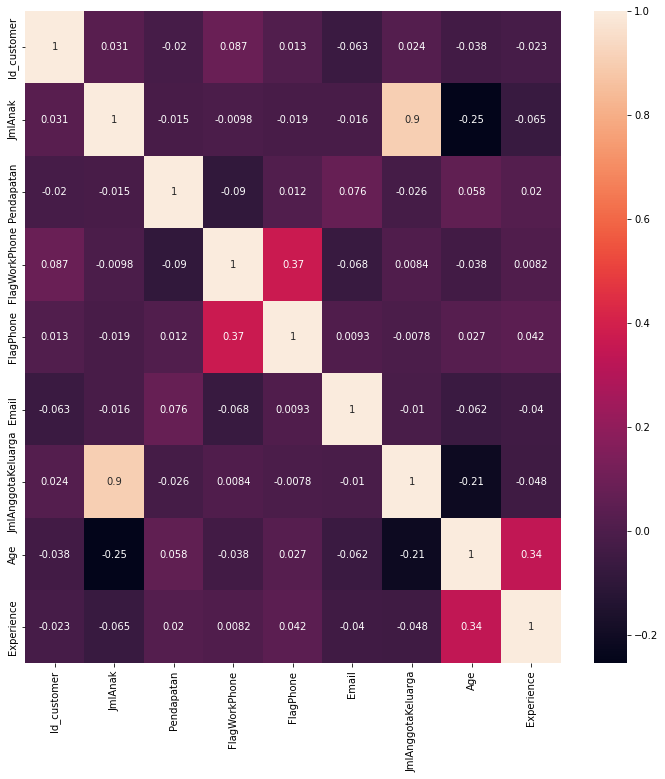

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

### Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


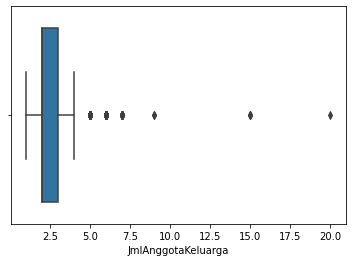

In [ ]:
sns.boxplot(data['JmlAnggotaKeluarga'])

In [ ]:
Q1 = data['JmlAnggotaKeluarga'].quantile(0.25)
Q3 = data['JmlAnggotaKeluarga'].quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print(Upper_Whisker, Lower_Whisker)

2.0
3.0
1.0
4.5 0.5


In [ ]:
data = data[data['JmlAnggotaKeluarga'] < Upper_Whisker]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


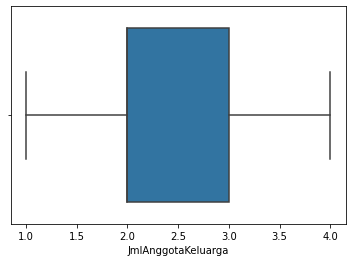

In [ ]:
sns.boxplot(data['JmlAnggotaKeluarga'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


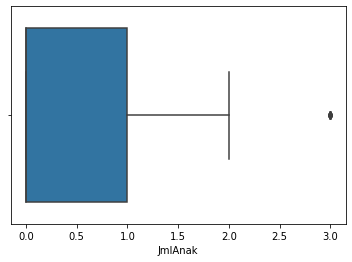

In [ ]:
sns.boxplot(data['JmlAnak'])

In [ ]:
Q1 = data['JmlAnak'].quantile(0.25)
Q3 = data['JmlAnak'].quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print(Upper_Whisker, Lower_Whisker)

0.0
1.0
1.0
2.5 -1.5


In [ ]:
data = data[data['JmlAnak'] < Upper_Whisker]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


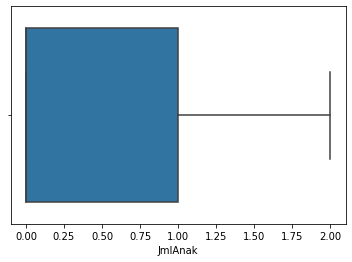

In [ ]:
sns.boxplot(data['JmlAnak'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


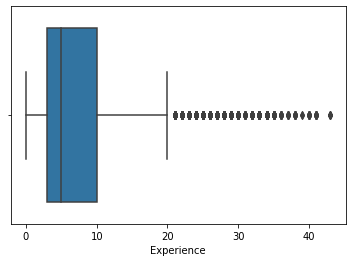

In [ ]:
sns.boxplot(data['Experience'])

In [ ]:
Q1 = data['Experience'].quantile(0.25)
Q3 = data['Experience'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print(Upper_Whisker, Lower_Whisker)

3.0
10.0
7.0
20.5 -7.5


In [ ]:
data = data[data['Experience'] < Upper_Whisker]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


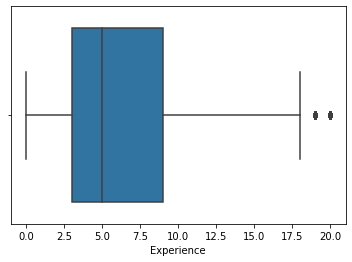

In [ ]:
sns.boxplot(data['Experience'])

## EDA

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


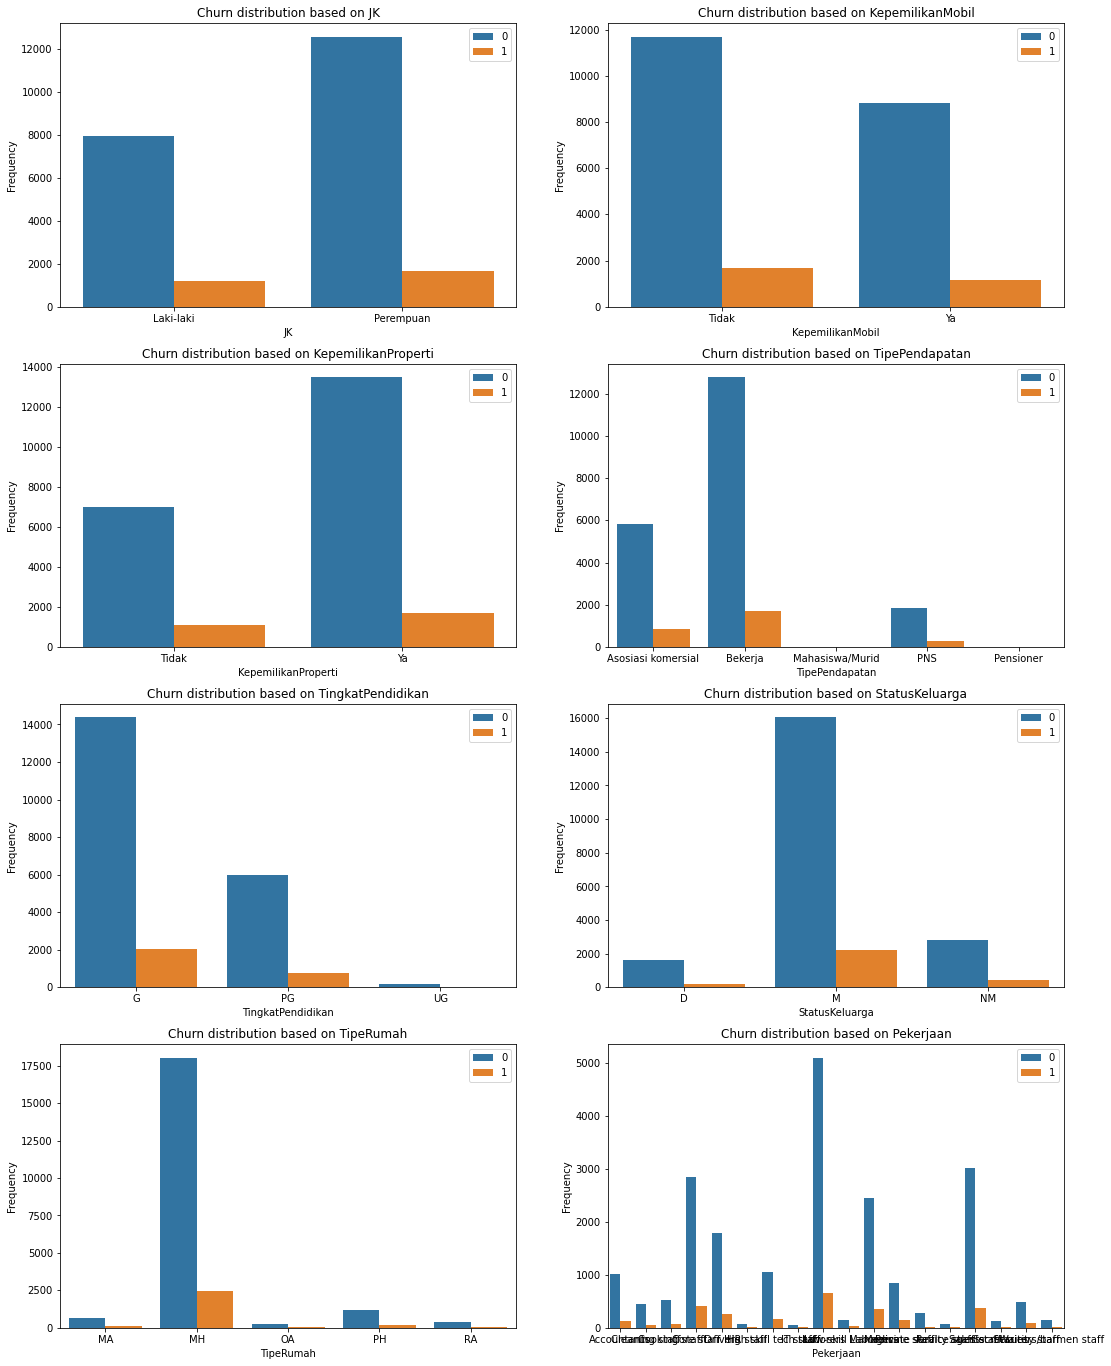

In [ ]:
fig = plt.figure(figsize=(18,24))

column = data.select_dtypes('category').columns.to_list()
column_label = column

for i in range(1, 9):
  plt.subplot(int(f'42{i}'))
  sns.countplot(data[column[i-1]], hue=data["Overdue"], hue_order=[0,1])
  plt.xlabel(f'{column_label[i-1]}', fontsize=10)
  plt.ylabel('Frequency', fontsize=10)
  plt.title(f'Churn distribution based on {column_label[i-1]}')
  plt.legend(loc='upper right')
plt.show()

## Split Data and Normalization

In [ ]:
data.shape

(23366, 18)

In [ ]:
# Bagi training dan test 70 30

X = data.drop('Overdue', axis=1)
y = data['Overdue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## One Hot Encoding

In [ ]:
columns = X.select_dtypes('category').columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(X_train[columns])

OneHotEncoder(drop='first', sparse=False)

In [ ]:
X_train_encoded = pd.DataFrame(encoder.transform(X_train[columns]),
                               index=X_train.index,
                               columns=encoder.get_feature_names(X_train[columns].columns))

X_train_encoded.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,JK_Perempuan,KepemilikanMobil_Ya,KepemilikanProperti_Ya,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TingkatPendidikan_PG,TingkatPendidikan_UG,StatusKeluarga_M,...,Pekerjaan_Laborers,Pekerjaan_Low-skill Laborers,Pekerjaan_Managers,Pekerjaan_Medicine staff,Pekerjaan_Private service staff,Pekerjaan_Realty agents,Pekerjaan_Sales staff,Pekerjaan_Secretaries,Pekerjaan_Security staff,Pekerjaan_Waiters/barmen staff
13551,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12212,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18685,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21503,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15231,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_dummy = pd.concat([X_train.select_dtypes(exclude="category"),
                           X_train_encoded], axis=1)
X_train_dummy.head()

,Id_customer,JmlAnak,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,JK_Perempuan,...,Pekerjaan_Laborers,Pekerjaan_Low-skill Laborers,Pekerjaan_Managers,Pekerjaan_Medicine staff,Pekerjaan_Private service staff,Pekerjaan_Realty agents,Pekerjaan_Sales staff,Pekerjaan_Secretaries,Pekerjaan_Security staff,Pekerjaan_Waiters/barmen staff
13551,5041909,0,202500.0,0,1,0,2,52,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12212,5029464,1,112500.0,0,0,1,3,29,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18685,5090788,1,225000.0,0,0,0,2,30,4,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21503,5115939,0,45000.0,1,1,0,2,28,2,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15231,5054274,0,292500.0,0,1,0,2,40,10,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test_encoded = pd.DataFrame(encoder.transform(X_test[columns]),
                              index=X_test.index,
                              columns=encoder.get_feature_names(X_test[columns].columns))

X_test_dummy = pd.concat([X_test.select_dtypes(exclude="category"),
                          X_test_encoded], axis=1)

X_test_dummy.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Id_customer,JmlAnak,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,JK_Perempuan,...,Pekerjaan_Laborers,Pekerjaan_Low-skill Laborers,Pekerjaan_Managers,Pekerjaan_Medicine staff,Pekerjaan_Private service staff,Pekerjaan_Realty agents,Pekerjaan_Sales staff,Pekerjaan_Secretaries,Pekerjaan_Security staff,Pekerjaan_Waiters/barmen staff
15364,5054727,1,112500.0,1,0,0,3,51,3,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
616,5021691,1,225000.0,0,0,0,3,36,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18701,5090846,1,135000.0,1,1,1,2,29,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18824,5091241,0,112500.0,0,0,0,2,45,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13302,5041136,0,225000.0,0,0,0,1,47,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Normalize data

mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train_dummy), columns=X_train_dummy.columns).set_index(X_train_dummy.index)
X_test_scaled = pd.DataFrame(mms.transform(X_test_dummy), columns=X_test_dummy.columns).set_index(X_test_dummy.index)

In [ ]:
#imbalance data

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)


In [ ]:
X_scaled

,Id_customer,JmlAnak,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,JK_Perempuan,...,Pekerjaan_Laborers,Pekerjaan_Low-skill Laborers,Pekerjaan_Managers,Pekerjaan_Medicine staff,Pekerjaan_Private service staff,Pekerjaan_Realty agents,Pekerjaan_Sales staff,Pekerjaan_Secretaries,Pekerjaan_Security staff,Pekerjaan_Waiters/barmen staff
13551,0.233645,0.0,0.113372,0.0,1.0,0.0,0.333333,0.673913,0.05,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12212,0.145806,0.5,0.055233,0.0,0.0,1.0,0.666667,0.173913,0.40,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18685,0.578638,0.5,0.127907,0.0,0.0,0.0,0.333333,0.195652,0.20,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21503,0.756156,0.0,0.011628,1.0,1.0,0.0,0.333333,0.152174,0.10,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15231,0.320918,0.0,0.171512,0.0,1.0,0.0,0.333333,0.413043,0.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15314,0.322746,0.0,0.104651,1.0,0.0,0.0,0.333333,0.478261,0.30,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9539,0.000847,0.0,0.174419,0.0,0.0,0.0,0.000000,0.478261,0.45,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20669,0.686542,0.0,0.069767,0.0,0.0,0.0,0.333333,0.717391,0.95,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7385,0.763645,0.5,0.127907,0.0,0.0,0.0,0.666667,0.173913,0.40,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_balanced

,Id_customer,JmlAnak,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,JK_Perempuan,...,Pekerjaan_Laborers,Pekerjaan_Low-skill Laborers,Pekerjaan_Managers,Pekerjaan_Medicine staff,Pekerjaan_Private service staff,Pekerjaan_Realty agents,Pekerjaan_Sales staff,Pekerjaan_Secretaries,Pekerjaan_Security staff,Pekerjaan_Waiters/barmen staff
0,0.233645,0.000000,0.113372,0.0,1.000000,0.0,0.333333,0.673913,0.050000,1.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.145806,0.500000,0.055233,0.0,0.000000,1.0,0.666667,0.173913,0.400000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.578638,0.500000,0.127907,0.0,0.000000,0.0,0.333333,0.195652,0.200000,1.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.756156,0.000000,0.011628,1.0,1.000000,0.0,0.333333,0.152174,0.100000,1.000000,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.320918,0.000000,0.171512,0.0,1.000000,0.0,0.333333,0.413043,0.500000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28711,0.684415,0.000000,0.088484,0.0,0.000000,0.0,0.333333,0.426156,0.186310,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
28712,0.281355,0.635106,0.065840,1.0,0.270213,0.0,0.756738,0.435384,0.090532,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
28713,0.106970,0.965059,0.115060,0.0,0.000000,0.0,0.976706,0.316972,0.103494,0.000000,...,0.069882,0.0,0.0,0.0,0.0,0.0,0.930118,0.0,0.0,0.0
28714,0.883292,0.000000,0.126119,0.0,0.000000,0.0,0.333333,0.188618,0.050000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0


## Modelling

In [ ]:
classifiers = {
    "DecisionTree" : DecisionTreeClassifier(),
    "XGBoost" : XGBClassifier()
}

In [ ]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
  classifier.fit(X_balanced, y_balanced)
  train_score = classifier.score(X_balanced, y_balanced)
  train_scores.append(train_score)
  test_score = classifier.score(X_test_balanced, y_test_balanced)
  test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.9996517620838556, 0.8200654687282352]
[0.8154558751828377, 0.8425158459288152]


In [ ]:
cl = ['Decision Tree', 'XGBoost']

In [ ]:
predict = pd.DataFrame({"Method":cl, "Score Train":train_scores, "Score Test":test_scores})
predict

,Method,Score Train,Score Test
0,Decision Tree,0.999652,0.815456
1,XGBoost,0.820065,0.842516


In [ ]:
model_xgb = XGBClassifier(
    seed = 1444,
    n_estimators = 60,
    learning_rate = 0.7,
    colsample_bytree = 0.5,
    subsample = 1,
    max_depth = 10,
    eval_metric = "logloss",
    use_label_encoder = False)

model_xgb.fit(X_balanced, y_balanced)

XGBClassifier(colsample_bytree=0.5, eval_metric='logloss', learning_rate=0.7,
              max_depth=10, n_estimators=60, seed=1444,
              use_label_encoder=False)

In [ ]:
print(classification_report(y_true=y_balanced,
                            y_pred=model_xgb.predict(X_balanced),
                            target_names=["Not Overdue", "Overdue"],
                            digits=5))

print(classification_report(y_true=y_test_balanced,
                            y_pred=model_xgb.predict(X_test_balanced),
                            target_names=["Not Overdue", "Overdue"],
                            digits=5))

              precision    recall  f1-score   support

 Not Overdue    0.95373   0.96754   0.96059     14358
     Overdue    0.96707   0.95306   0.96001     14358

    accuracy                        0.96030     28716
   macro avg    0.96040   0.96030   0.96030     28716
weighted avg    0.96040   0.96030   0.96030     28716

              precision    recall  f1-score   support

 Not Overdue    0.87071   0.94458   0.90614      6153
     Overdue    0.93944   0.85974   0.89783      6153

    accuracy                        0.90216     12306
   macro avg    0.90508   0.90216   0.90199     12306
weighted avg    0.90508   0.90216   0.90199     12306



## Evaluasi Model

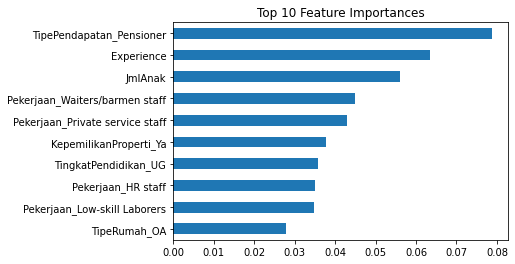

In [ ]:
pd.Series(
    model_xgb.feature_importances_,
    index=X_balanced.columns
    ).sort_values().tail(10).plot.barh(title="Top 10 Feature Importances")

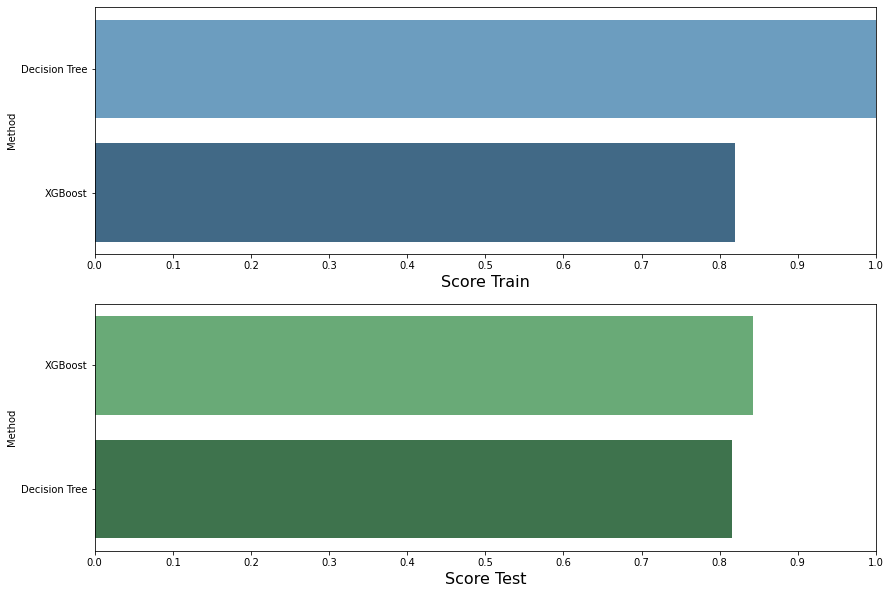

In [ ]:
# Visualsasi perbandingan model

f, axes = plt.subplots(2, 1, figsize=(14, 10))

predict.sort_values(by=['Score Train'], ascending=False, inplace=True)

sns.barplot(x="Score Train", y="Method", data = predict, palette='Blues_d', ax=axes[0])
# axes[0].set(xlabel="Region", ylabel='Charges')
axes[0].set_xlabel("Score Train", size=16)
axes[0].set_ylabel=('Method')
axes[0].set_xlim(0, 1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Score Test'], ascending=False, inplace=True)

sns.barplot(x="Score Test", y="Method", data = predict, palette='Greens_d', ax=axes[1])
# axes[0].set(xlabel="Region", ylabel='Charges')
axes[1].set_xlabel("Score Test", size=16)
axes[1].set_ylabel('Method')
axes[1].set_xlim(0, 1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## Testing

In [ ]:
testing = pd.read_csv("/content/drive/MyDrive/Final Project/dataset/data_test.csv")

testing.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5142248,Perempuan,Tidak,Ya,0,225000.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Private service staff,2.0,54.0,6.0
1,5036925,Perempuan,Ya,Ya,0,157500.0,Asosiasi komersial,Graduate,Menikah,Rumah pribadi,1,1,1,1,Core staff,2.0,33.0,8.0
2,5126080,Perempuan,Tidak,Ya,1,112500.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Managers,3.0,41.0,7.0
3,5088887,Perempuan,Tidak,Ya,0,171000.0,Bekerja,Graduate,Belum Menikah,Sewa Apartemen,1,0,0,0,Laborers,1.0,46.0,2.0
4,5022156,Perempuan,Ya,Ya,2,180000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,1,0,1,1,NaN,4.0,32.0,8.0


In [ ]:
testing = testing.drop(['FlagMobile'], axis=1)

testing.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5142248,Perempuan,Tidak,Ya,0,225000.0,PNS,Graduate,Menikah,Rumah pribadi,0,0,0,Private service staff,2.0,54.0,6.0
1,5036925,Perempuan,Ya,Ya,0,157500.0,Asosiasi komersial,Graduate,Menikah,Rumah pribadi,1,1,1,Core staff,2.0,33.0,8.0
2,5126080,Perempuan,Tidak,Ya,1,112500.0,PNS,Graduate,Menikah,Rumah pribadi,0,0,0,Managers,3.0,41.0,7.0
3,5088887,Perempuan,Tidak,Ya,0,171000.0,Bekerja,Graduate,Belum Menikah,Sewa Apartemen,0,0,0,Laborers,1.0,46.0,2.0
4,5022156,Perempuan,Ya,Ya,2,180000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,0,1,1,NaN,4.0,32.0,8.0


In [ ]:
testing.isnull().mean() * 100

Id_customer             0.0
JK                      0.0
KepemilikanMobil        0.0
KepemilikanProperti     0.0
JmlAnak                 0.0
Pendapatan              0.0
TipePendapatan          0.0
TingkatPendidikan       0.0
StatusKeluarga          0.0
TipeRumah               0.0
FlagWorkPhone           0.0
FlagPhone               0.0
Email                   0.0
Pekerjaan              29.5
JmlAnggotaKeluarga      0.0
Age                     0.0
Experience              0.0
dtype: float64

In [ ]:
testing = testing.dropna(subset=['Pekerjaan'], inplace=False)

In [ ]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          141 non-null    int64  
 1   JK                   141 non-null    object 
 2   KepemilikanMobil     141 non-null    object 
 3   KepemilikanProperti  141 non-null    object 
 4   JmlAnak              141 non-null    int64  
 5   Pendapatan           141 non-null    float64
 6   TipePendapatan       141 non-null    object 
 7   TingkatPendidikan    141 non-null    object 
 8   StatusKeluarga       141 non-null    object 
 9   TipeRumah            141 non-null    object 
 10  FlagWorkPhone        141 non-null    int64  
 11  FlagPhone            141 non-null    int64  
 12  Email                141 non-null    int64  
 13  Pekerjaan            141 non-null    object 
 14  JmlAnggotaKeluarga   141 non-null    float64
 15  Age                  141 non-null    flo

In [ ]:
columns_test = testing.select_dtypes('object').columns.to_list()

columns_test

['JK',
 'KepemilikanMobil',
 'KepemilikanProperti',
 'TipePendapatan',
 'TingkatPendidikan',
 'StatusKeluarga',
 'TipeRumah',
 'Pekerjaan']

In [ ]:
testing[columns_test] = testing[columns_test].astype('category')

In [ ]:
columns_test = testing.select_dtypes('category').columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(testing[columns_test])

OneHotEncoder(drop='first', sparse=False)

In [ ]:
test_encoded = pd.DataFrame(encoder.transform(testing[columns_test]),
                              index=testing.index,
                              columns=encoder.get_feature_names(testing[columns_test].columns))

test_dummy = pd.concat([testing.select_dtypes(exclude="category"),
                          test_encoded], axis=1)

test_dummy.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Id_customer,JmlAnak,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,JK_Perempuan,...,Pekerjaan_Core staff,Pekerjaan_Drivers,Pekerjaan_High skill tech staff,Pekerjaan_Laborers,Pekerjaan_Managers,Pekerjaan_Medicine staff,Pekerjaan_Private service staff,Pekerjaan_Sales staff,Pekerjaan_Security staff,Pekerjaan_Waiters/barmen staff
0,5142248,0,225000.0,0,0,0,2.0,54.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5036925,0,157500.0,1,1,1,2.0,33.0,8.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5126080,1,112500.0,0,0,0,3.0,41.0,7.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5088887,0,171000.0,0,0,0,1.0,46.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5139764,0,337500.0,0,0,0,2.0,65.0,21.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# test_dummy = test_dummy.values()

xgpred = model_xgb.predict(test_dummy, validate_features=False)

# xgpred = model_xgb.predict(test_dummy)
print(xgpred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
prediction = pd.DataFrame({'Id_customer':testing.Id_customer,'Prediksi': xgpred })

In [ ]:
prediction.head()

,Id_customer,Prediksi
0,5142248,0
1,5036925,0
2,5126080,0
3,5088887,0
6,5139764,0


In [ ]:
# Predict dataset
prediction.to_csv('df_predict.csv', header=True, index=False)

In [ ]:
Viz2 = pd.merge(testing, prediction, on=['Id_customer'], how='inner')

In [ ]:
# Dataset Vis2
Viz2.to_csv('df_Viz2.csv', header=True, index=False)

In [ ]:
Viz2.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Prediksi
0,5142248,Perempuan,Tidak,Ya,0,225000.0,PNS,Graduate,Menikah,Rumah pribadi,0,0,0,Private service staff,2.0,54.0,6.0,0
1,5036925,Perempuan,Ya,Ya,0,157500.0,Asosiasi komersial,Graduate,Menikah,Rumah pribadi,1,1,1,Core staff,2.0,33.0,8.0,0
2,5126080,Perempuan,Tidak,Ya,1,112500.0,PNS,Graduate,Menikah,Rumah pribadi,0,0,0,Managers,3.0,41.0,7.0,0
3,5088887,Perempuan,Tidak,Ya,0,171000.0,Bekerja,Graduate,Belum Menikah,Sewa Apartemen,0,0,0,Laborers,1.0,46.0,2.0,0
4,5139764,Laki-laki,Ya,Ya,0,337500.0,Bekerja,Postgraduate,Menikah,Rumah pribadi,0,0,0,Laborers,2.0,65.0,21.0,0
